In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Expanded_data_with_more_features.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [5]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [6]:
print(f'Загальна кількість студентів: '
      f'{df.Gender.count()}')

Загальна кількість студентів: 30641


<Axes: ylabel='proportion'>

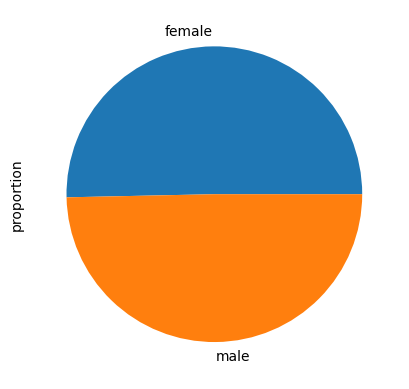

In [7]:
gender_freq = df.Gender.value_counts(normalize=True)
gender_freq.plot(kind = 'pie')

In [8]:
print(f'Відсоток студентів: '
      f'{round(gender_freq.male * 100, 2)}%')

Відсоток студентів: 49.66%


In [9]:
print(f'Відсоток студенток: '
      f'{round(gender_freq.female * 100, 2)}%')

Відсоток студенток: 50.34%


<Axes: xlabel='EthnicGroup'>

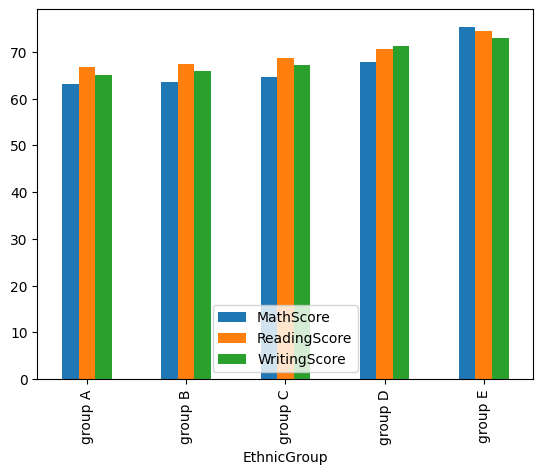

In [10]:
df.dropna().groupby('EthnicGroup')[['MathScore', 'ReadingScore', 'WritingScore']].mean().plot(kind = 'bar')

In [11]:
print(f'Етнічна група з найвищим середнім балом з математики: '
      f'{df.groupby("EthnicGroup").MathScore.mean().idxmax()}')

Етнічна група з найвищим середнім балом з математики: group E


In [12]:
print(f'Етнічна група з найвищим середнім балом з читання: '
      f'{df.groupby("EthnicGroup").ReadingScore.mean().idxmax()}')

Етнічна група з найвищим середнім балом з читання: group E


In [13]:
print(f'Етнічна група з найвищим середнім балом з письма: '
      f'{df.groupby("EthnicGroup").WritingScore.mean().idxmax()}')

Етнічна група з найвищим середнім балом з письма: group E


<Axes: xlabel='TestPrep'>

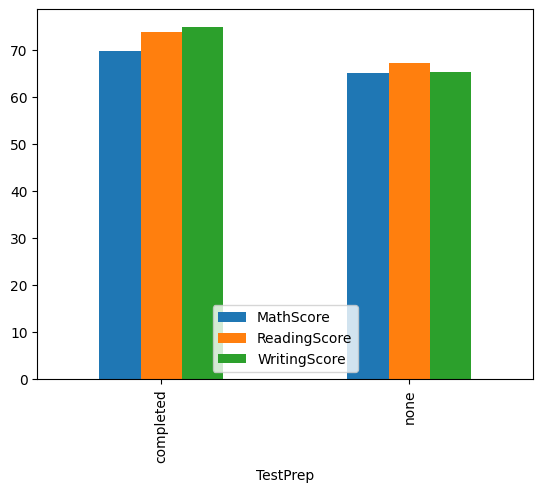

In [14]:
df.dropna().groupby('TestPrep')[['MathScore', 'ReadingScore', 'WritingScore']].mean().plot(kind = 'bar')

In [15]:
print(f'Середній бал з математики для студентів, які закінчили курс підготовки до тесту: '
      f'{df[df["TestPrep"] == "completed"].MathScore.mean():.2f}')

Середній бал з математики для студентів, які закінчили курс підготовки до тесту: 69.55


In [16]:
print(f'Середній бал з читання для студентів, які закінчили курс підготовки до тесту: '
      f'{df[df.TestPrep == "completed"].ReadingScore.mean():.2f}')

Середній бал з читання для студентів, які закінчили курс підготовки до тесту: 73.73


In [17]:
print(f'Загальний середній бал з усіх предметів для студентів, які закінчили курс підготовки до тесту: '
      f'{df.loc[df["TestPrep"]=="completed", ["MathScore", "ReadingScore", "WritingScore"]].mean(axis=1).mean():.2f}')

Загальний середній бал з усіх предметів для студентів, які закінчили курс підготовки до тесту: 72.66


<Axes: ylabel='count'>

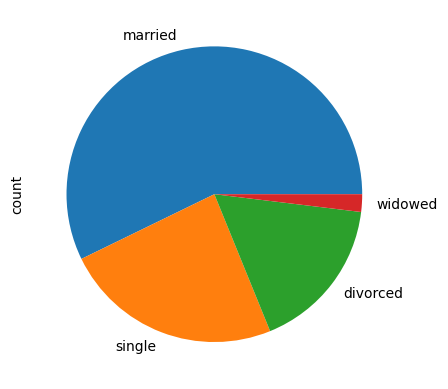

In [18]:
df.dropna().ParentMaritalStatus.value_counts().plot(kind = 'pie')

In [19]:
print(f'Кількість студентів, які мають одружених батьків: '
      f'{df.ParentMaritalStatus.value_counts().married}')

Кількість студентів, які мають одружених батьків: 16844


In [20]:
print(f'Кількість студентів, які мають батьків-одинаків: '
      f'{df.ParentMaritalStatus.value_counts().single}')

Кількість студентів, які мають батьків-одинаків: 7097


<Axes: xlabel='PracticeSport'>

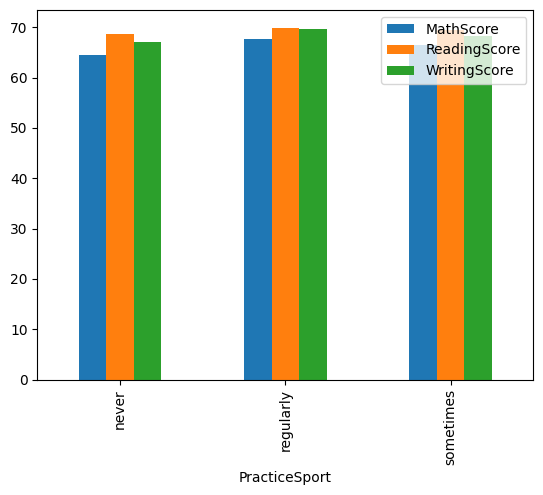

In [21]:
df.dropna().groupby('PracticeSport')[['MathScore', 'ReadingScore', 'WritingScore']].mean().plot(kind = 'bar')

In [22]:
print(f'{"Cтуденти, які регулярно займаються спортом, мають вищі середні результати з математики, ніж ті, хто ніколи не займався спортом" if df[df.PracticeSport == "regularly"].MathScore.mean() > df[df.PracticeSport == "never"].MathScore.mean() else "Cтуденти, які регулярно займаються спортом, мають нижчі середні результати з математики, ніж ті, хто ніколи не займався спортом"}')

Cтуденти, які регулярно займаються спортом, мають вищі середні результати з математики, ніж ті, хто ніколи не займався спортом


In [23]:
print(f'{"Cтуденти, які регулярно займаються спортом, мають вищі середні результати з читання, ніж ті, хто ніколи не займався спортом" if df[df.PracticeSport == "regularly"].ReadingScore.mean() > df[df.PracticeSport == "never"].ReadingScore.mean() else "Cтуденти, які регулярно займаються спортом, мають нижчі середні результати з читання, ніж ті, хто ніколи не займався спортом"}')

Cтуденти, які регулярно займаються спортом, мають вищі середні результати з читання, ніж ті, хто ніколи не займався спортом


<Axes: ylabel='count'>

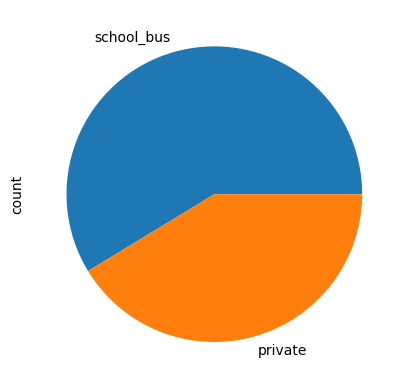

In [24]:
df.TransportMeans.value_counts().plot(kind = 'pie')

In [25]:
print(f'Кількість студентів, які користуються шкільним автобусом: '
      f'{df.TransportMeans.value_counts().school_bus}')

Кількість студентів, які користуються шкільним автобусом: 16145


In [26]:
print(f'Кількість студентів, які користуються приватним транспортом: '
      f'{df.TransportMeans.value_counts().private}')

Кількість студентів, які користуються приватним транспортом: 11362


In [27]:
data = df.copy()
data = data.dropna()

In [28]:
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [29]:
X = data.drop(['TestPrep'], axis=1)
y = data['TestPrep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Accuracy: 0.7300597557807222
Classification Report:
               precision    recall  f1-score   support

   completed       0.67      0.43      0.52      1328
        none       0.75      0.89      0.81      2521

    accuracy                           0.73      3849
   macro avg       0.71      0.66      0.67      3849
weighted avg       0.72      0.73      0.71      3849

